# We will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

# Case Study - We are going to analyse and predict Sales of a particular brick and mortar retail store. The data that we have ranges from 2000 to 2015.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Read the data from the '.csv' file as a monthly Time Series.

In [3]:
df = pd.read_csv('/Users/ishashukla/Downloads/Sales.csv')
df.head()

,RetailSales
0,2585
1,3368
2,3210
3,3111
4,3756


## Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [4]:
date = pd.date_range(start='1/1/2000', end='8/1/2015', freq='M')
date

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
               '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
               '2015-06-30', '2015-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,RetailSales,Time_Stamp
0,2585,2000-01-31
1,3368,2000-02-29
2,3210,2000-03-31
3,3111,2000-04-30
4,3756,2000-05-31


In [6]:
df.set_index('Time_Stamp',inplace=True)
df.head()

,RetailSales
Time_Stamp,
2000-01-31,2585
2000-02-29,3368
2000-03-31,3210
2000-04-30,3111
2000-05-31,3756


## Plot the Time Series to understand the behaviour of the data.

In [7]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

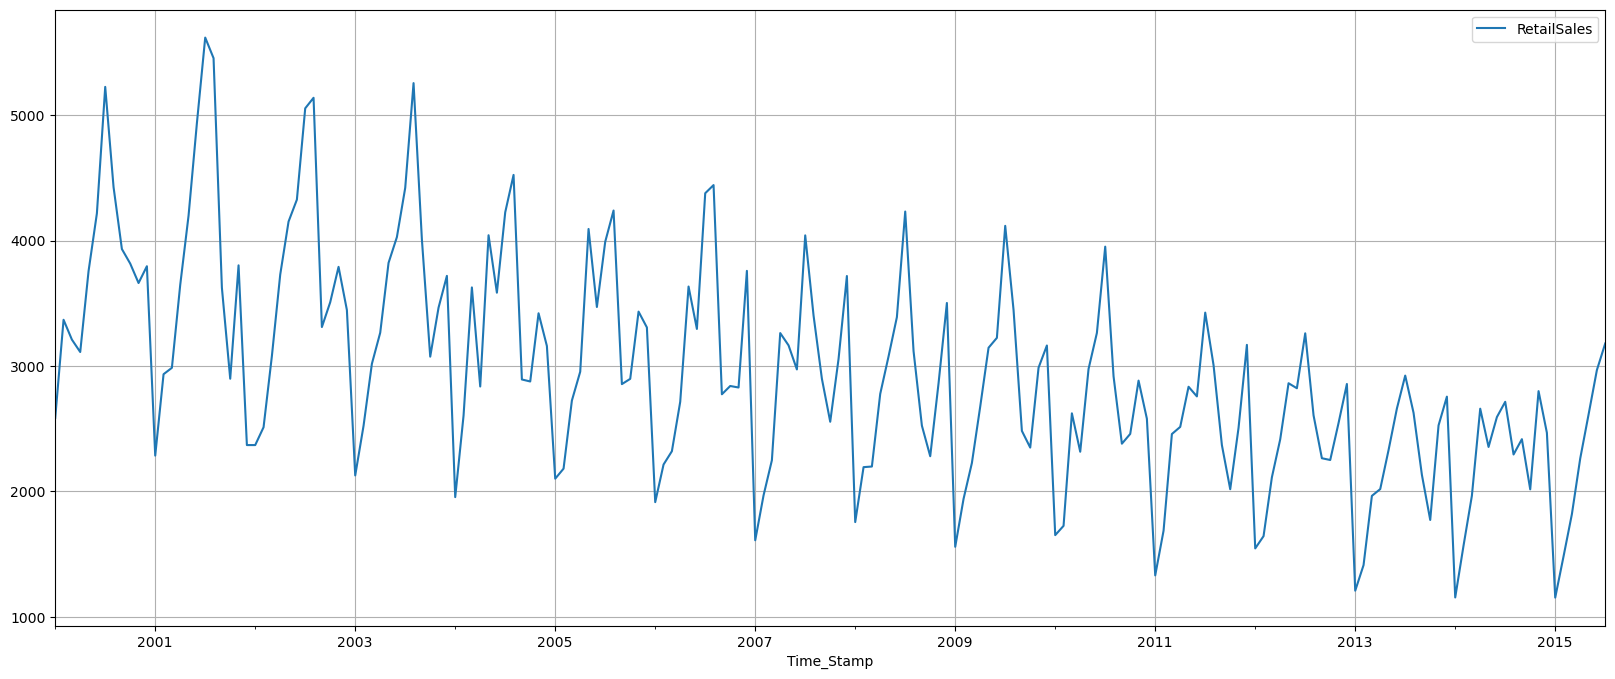

In [8]:
df.plot()
plt.grid();

We can see that there is a slight downward trend with a seasonal pattern associated as well.

## Check the basic measures of descriptive statistics

In [9]:
df.describe()

,RetailSales
count,187.000000
mean,2962.304813
std,878.968431
min,1153.000000
25%,2361.500000
50%,2876.000000
75%,3467.500000
max,5618.000000


The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

## Plot a boxplot to understand the spread of accidents across different years and within different months across years.

### Yearly Boxplot

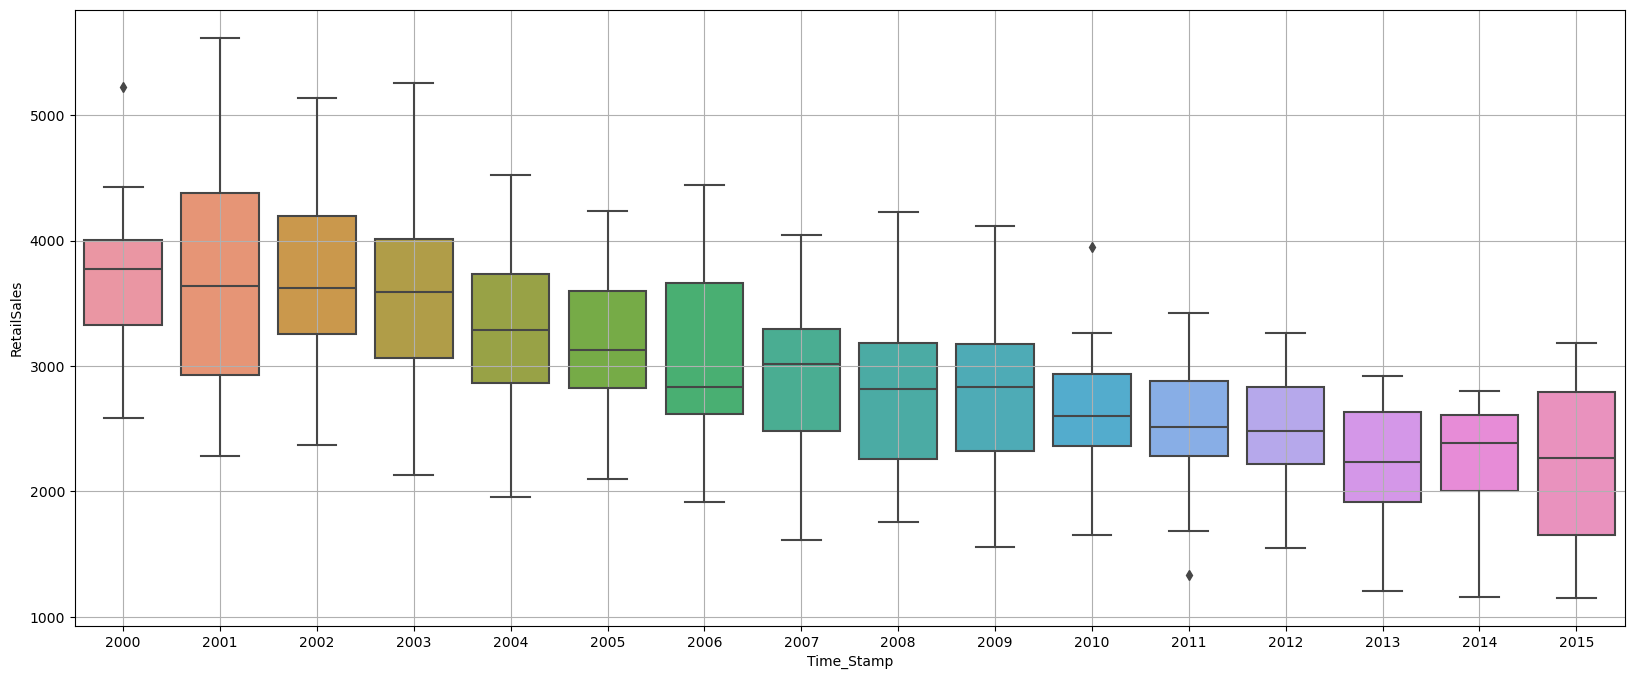

In [10]:
sns.boxplot(x = df.index.year,y = df['RetailSales'])
plt.grid();

The yearly boxplots also shows that the Sales have decreased towards the last few years.

### Monthly Plot

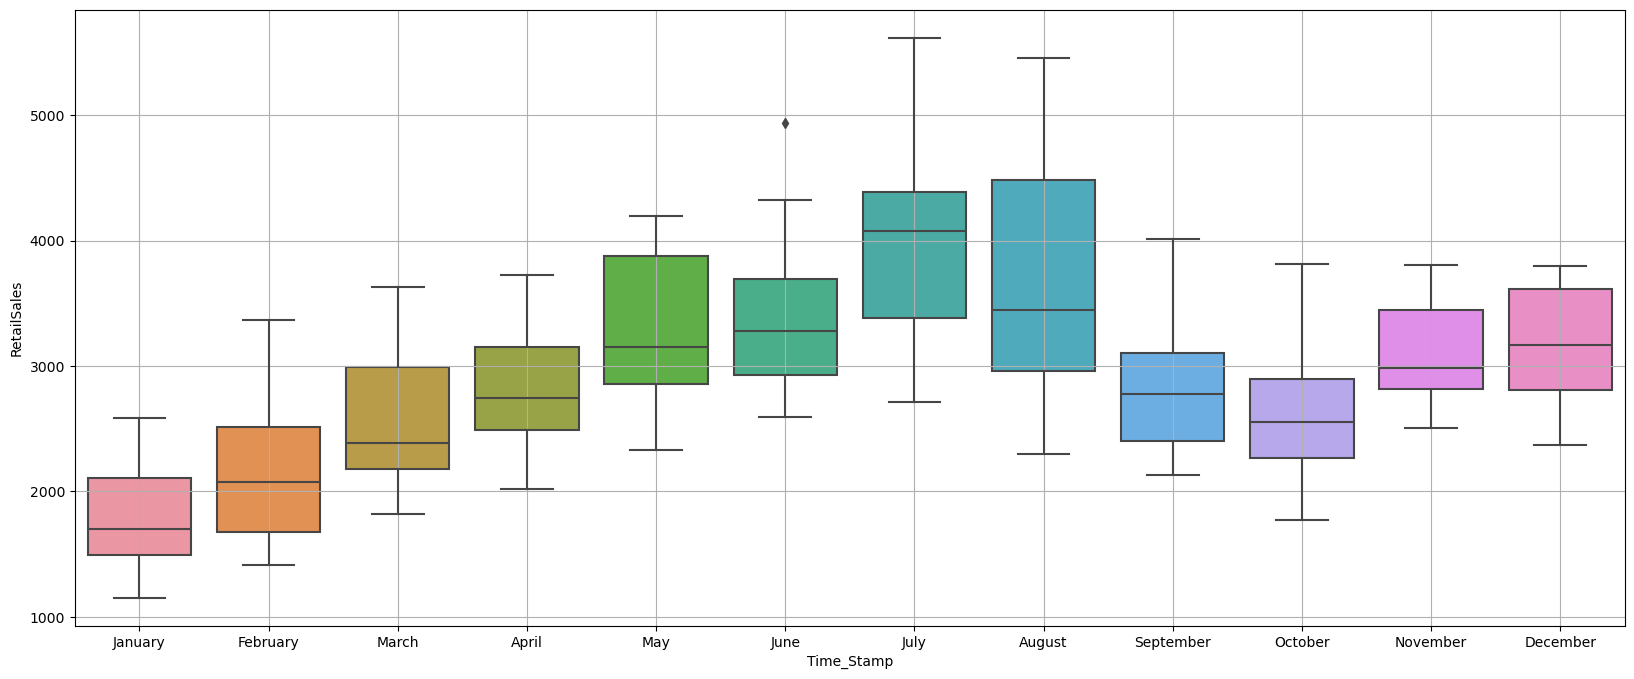

In [11]:
sns.boxplot(x = df.index.month_name(),y = df['RetailSales'])
plt.grid();

There is a clear distinction of 'RetailSales' within different months spread across various years. The highest such numbers are being recorded in the month of July-August across various years.

## Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

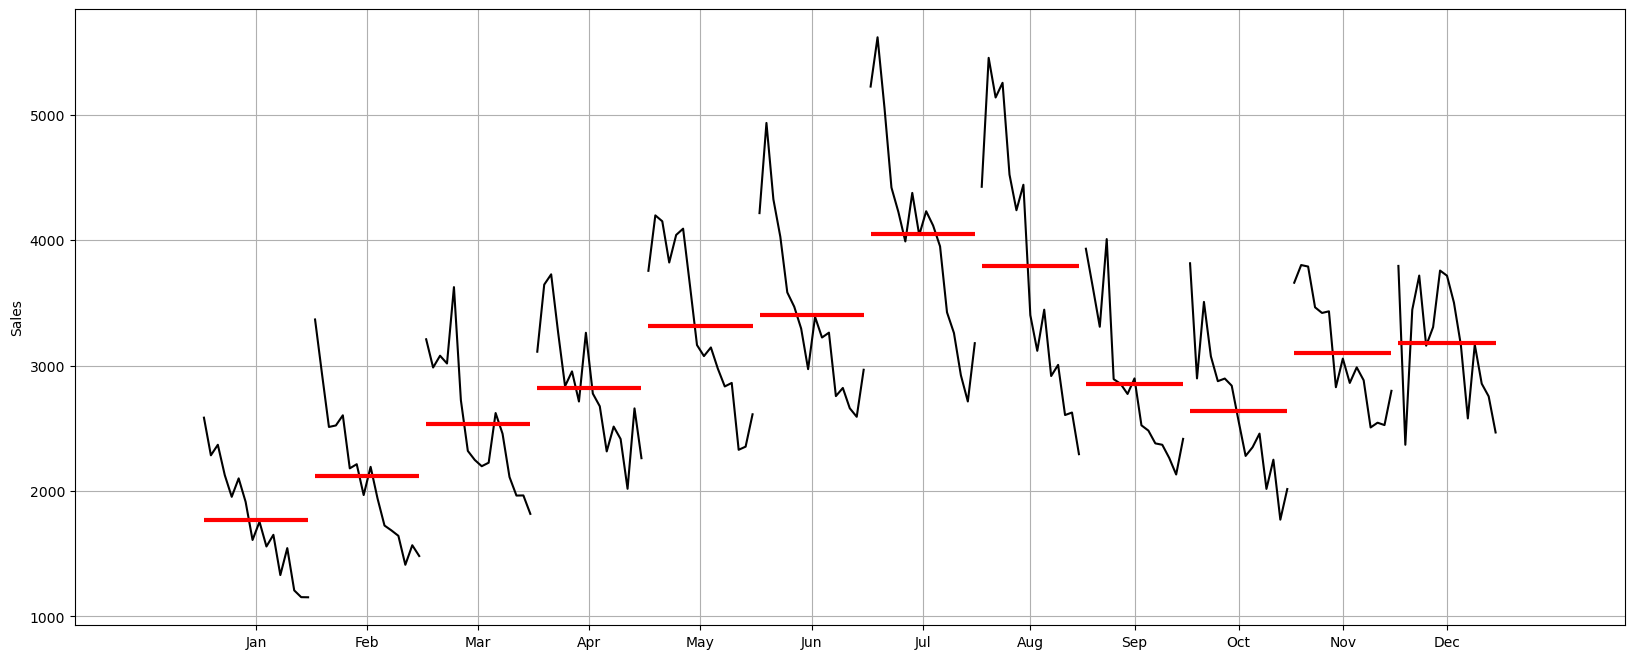

In [12]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['RetailSales'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('RetailSales' in this case) across various months. The red line is the median value.

## Plot a graph of monthly RetailSales across years.

In [13]:
monthly_sales_across_years = pd.pivot_table(df, values = 'RetailSales', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
2000,2585.0,3368.0,3210.0,3111.0,3756.0,4216.0,5225.0,4426.0,3932.0,3816.0,3661.0,3795.0
2001,2285.0,2934.0,2985.0,3646.0,4198.0,4935.0,5618.0,5454.0,3624.0,2898.0,3802.0,2369.0
2002,2369.0,2511.0,3079.0,3728.0,4151.0,4326.0,5054.0,5138.0,3310.0,3508.0,3790.0,3446.0
2003,2127.0,2523.0,3017.0,3265.0,3822.0,4027.0,4420.0,5255.0,4009.0,3074.0,3465.0,3718.0
2004,1954.0,2604.0,3626.0,2836.0,4042.0,3584.0,4225.0,4523.0,2892.0,2876.0,3420.0,3159.0
2005,2101.0,2181.0,2724.0,2954.0,4092.0,3470.0,3990.0,4239.0,2855.0,2897.0,3433.0,3307.0
2006,1914.0,2214.0,2320.0,2714.0,3633.0,3295.0,4377.0,4442.0,2774.0,2840.0,2828.0,3758.0
2007,1610.0,1968.0,2248.0,3262.0,3164.0,2972.0,4041.0,3402.0,2898.0,2555.0,3056.0,3717.0
2008,1755.0,2193.0,2198.0,2777.0,3076.0,3389.0,4231.0,3118.0,2524.0,2280.0,2862.0,3502.0


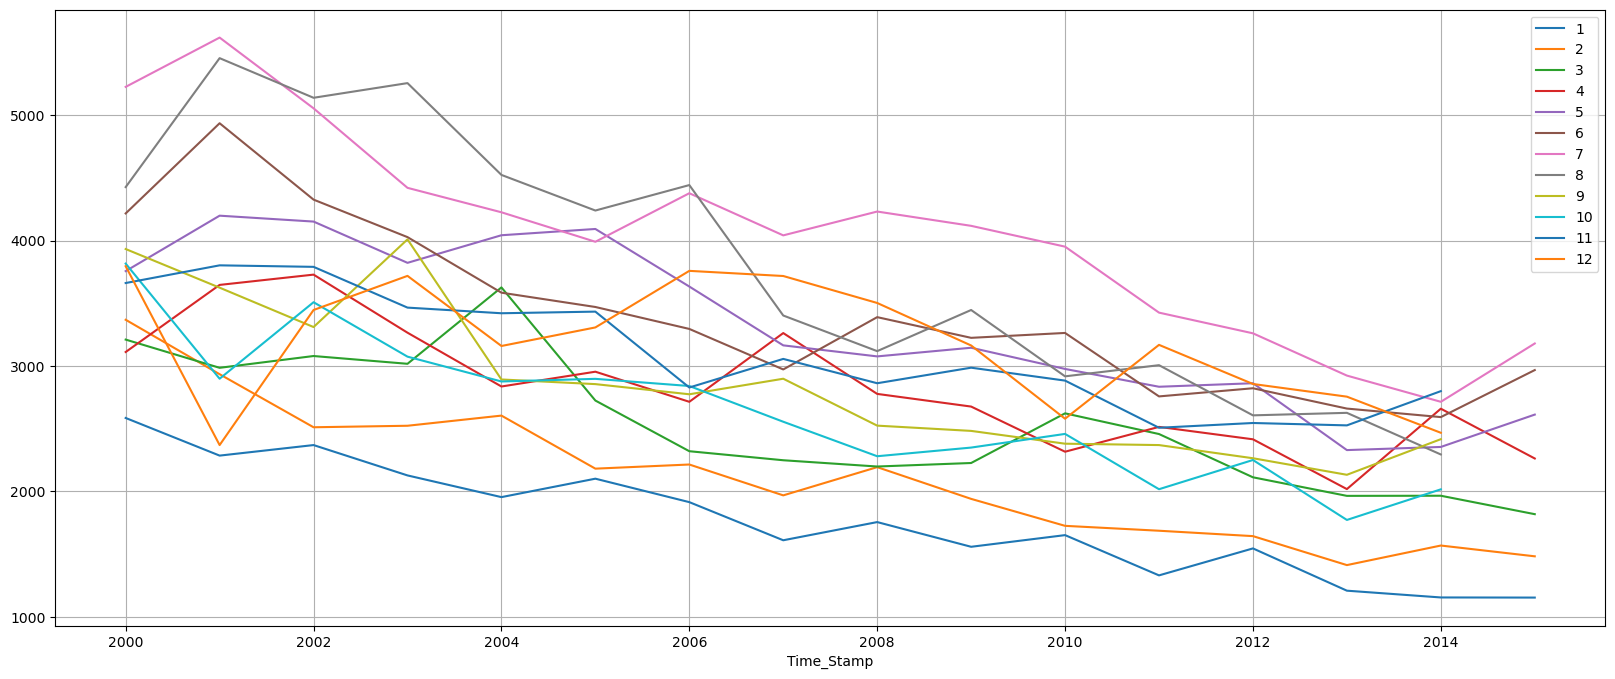

In [14]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

## Plot the Empirical Cumulative Distribution.

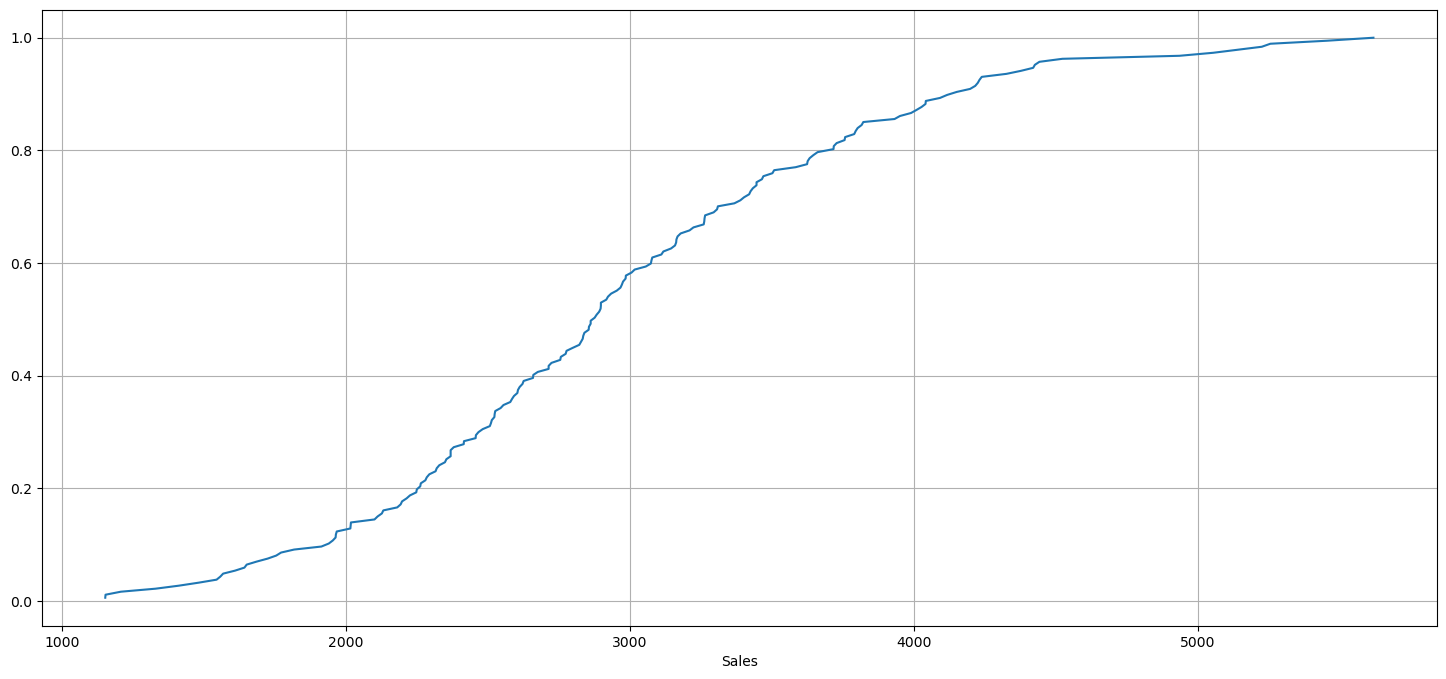

In [15]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['RetailSales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.

## Plot the average RetailSales per month and the month on month percentage change of RetailSales.

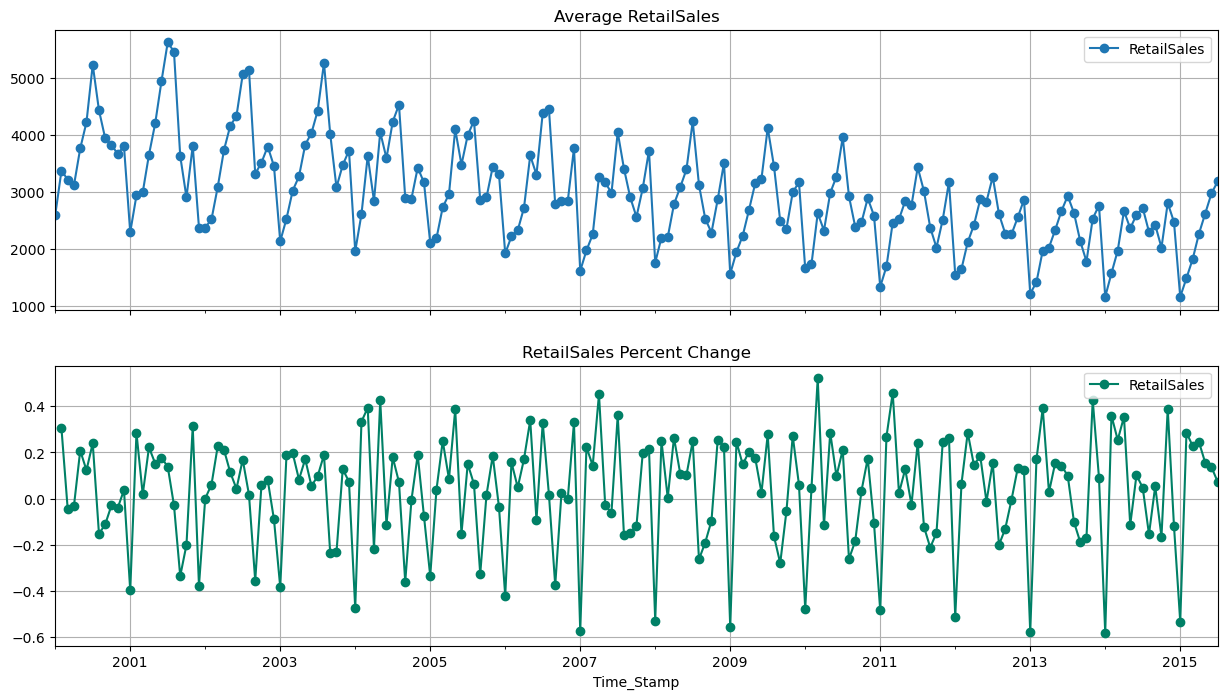

In [16]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["RetailSales"].mean()
pct_change = df.groupby(df.index)["RetailSales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average RetailSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RetailSales Percent Change",grid=True)

The above two graphs tells us the Average 'RetailSales' and the Percentage change of 'RetailSales' with respect to the time.

## Decompose the Time Series and plot the different components.

In [17]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

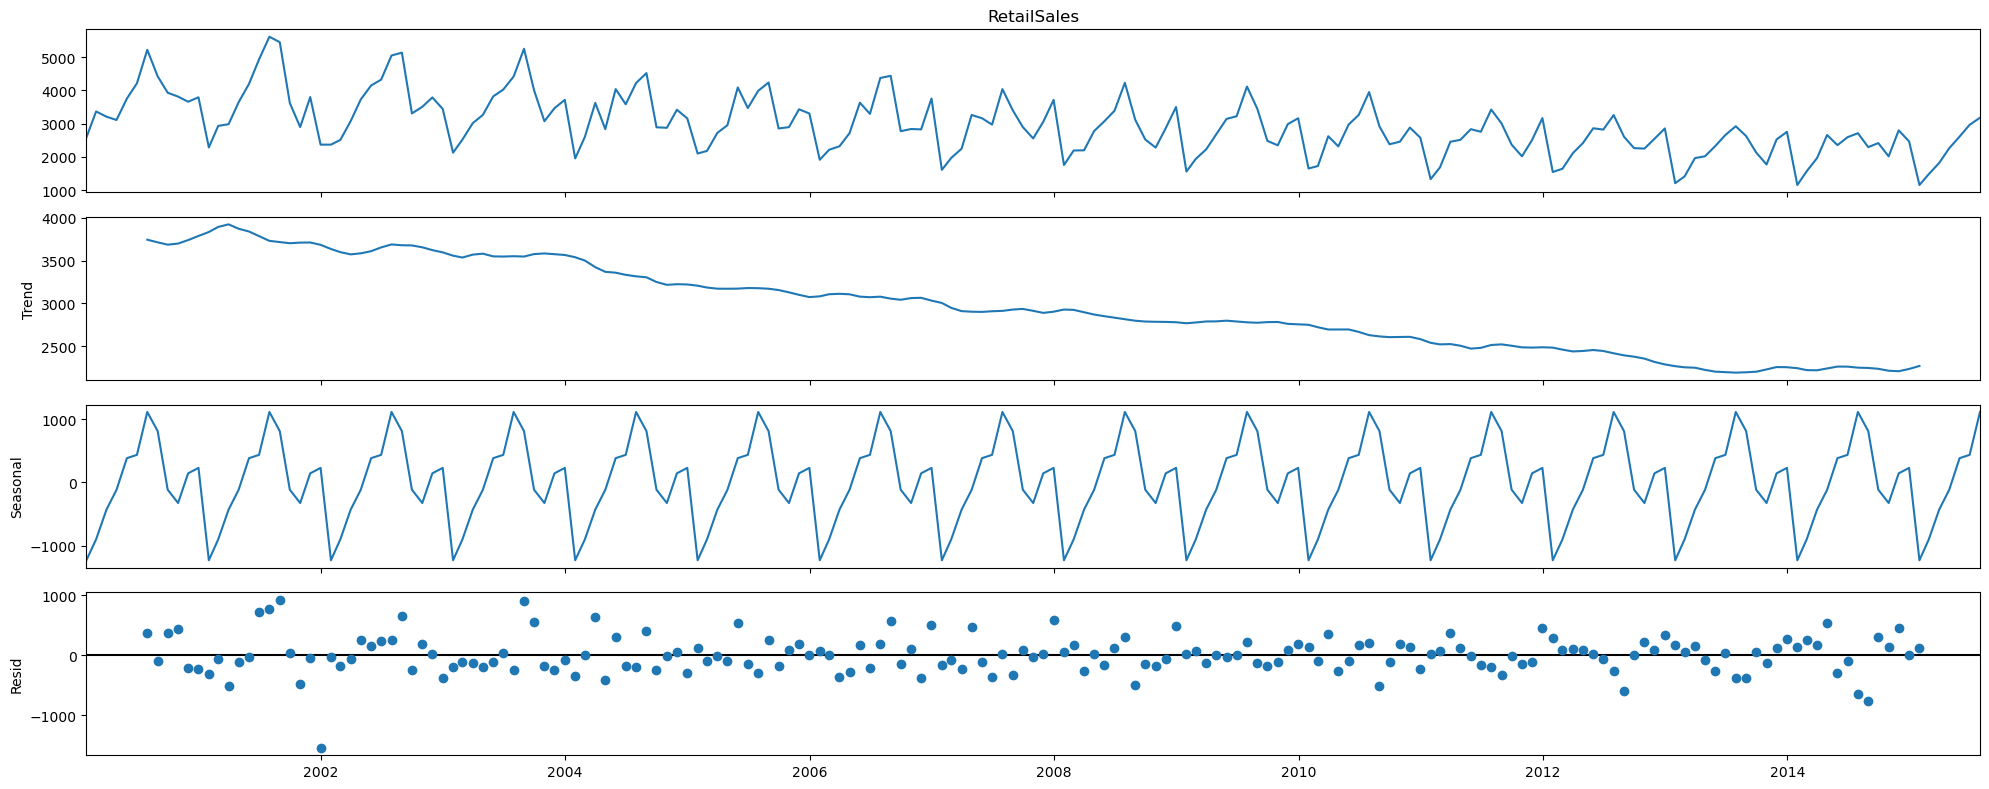

In [18]:
decomposition = seasonal_decompose(df['RetailSales'],model='additive')
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [19]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2000-01-31            NaN
2000-02-29            NaN
2000-03-31            NaN
2000-04-30            NaN
2000-05-31            NaN
2000-06-30            NaN
2000-07-31    3745.916667
2000-08-31    3715.333333
2000-09-30    3687.875000
2000-10-31    3700.791667
2000-11-30    3741.500000
2000-12-31    3789.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2000-01-31   -1230.608333
2000-02-29    -900.364286
2000-03-31    -429.435714
2000-04-30    -116.923810
2000-05-31     383.713095
2000-06-30     435.802381
2000-07-31    1113.975000
2000-08-31     811.258333
2000-09-30    -115.036111
2000-10-31    -325.811111
2000-11-30     143.525000
2000-12-31     229.905556
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2000-01-31           NaN
2000-02-29           NaN
2000-03-31           NaN
2000-04-30           NaN
2000-05-31           NaN
2000-06-30           NaN
2000-07-31    365.108333
2000-08-31   -100.591667
2000-09-30    359.161111
2000-10-31    441.0194

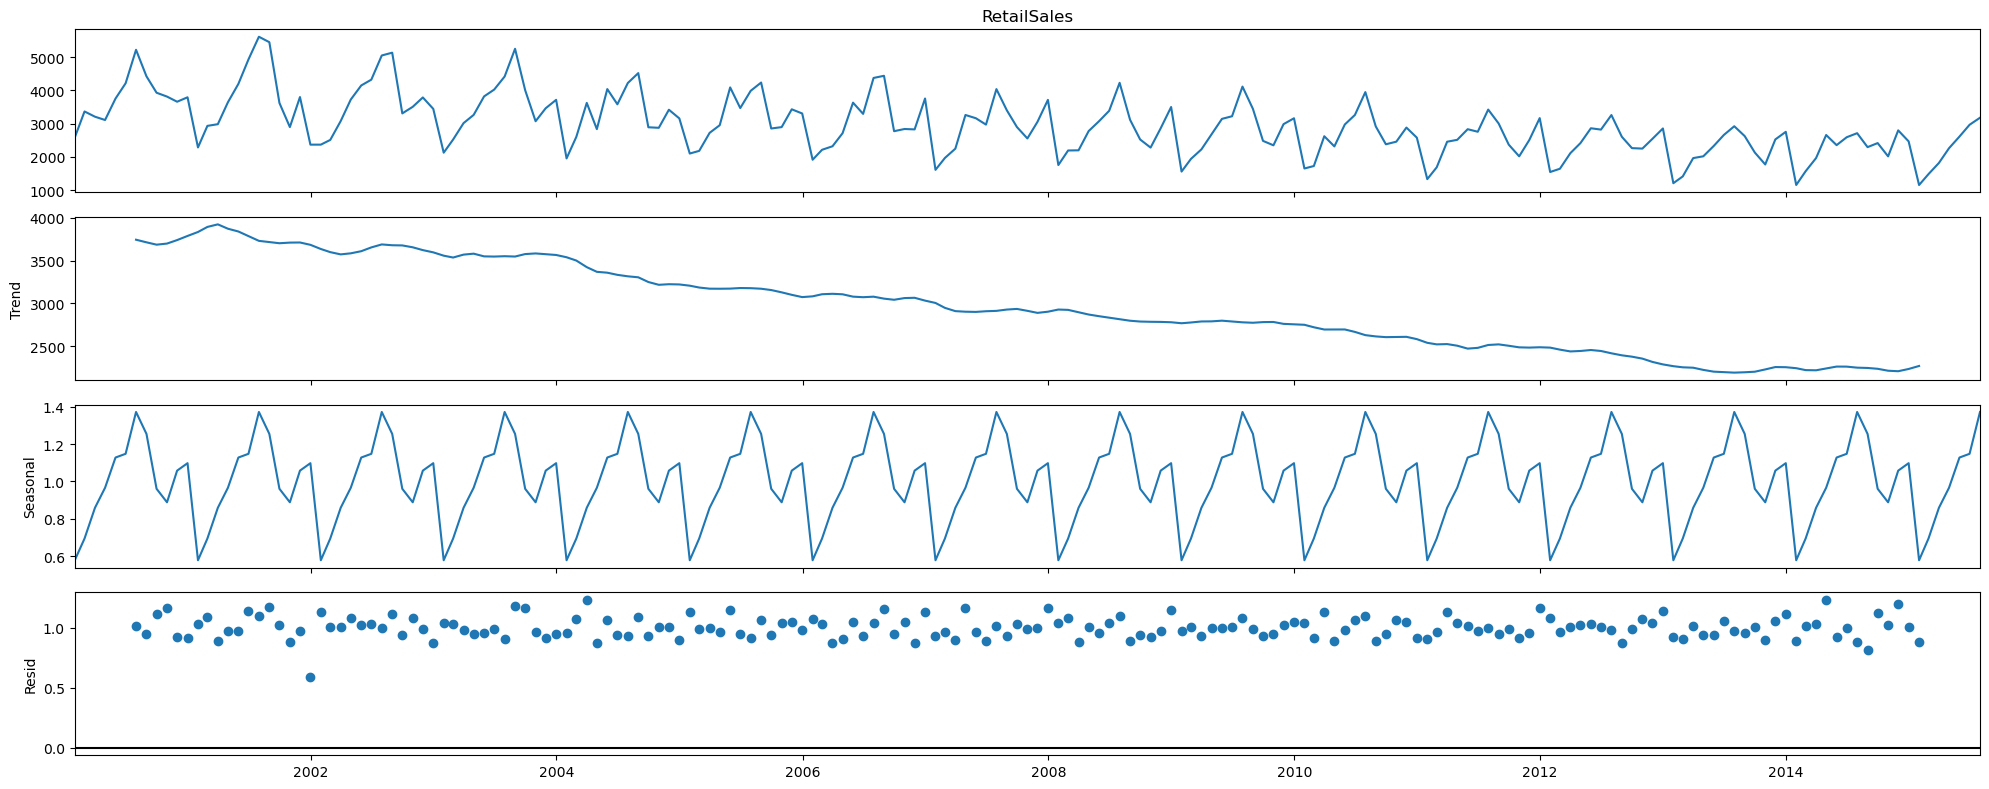

In [20]:
decomposition = seasonal_decompose(df['RetailSales'],model='multiplicative')
decomposition.plot();

- **For the multiplicative series, we see that a lot of residuals are located around 1. Thus Multiplicative Decomposition is the right way to decompose the time series **
- **Also it is evident that there is a 6 month seasonality in the data from the above plots **


In [21]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2000-01-31            NaN
2000-02-29            NaN
2000-03-31            NaN
2000-04-30            NaN
2000-05-31            NaN
2000-06-30            NaN
2000-07-31    3745.916667
2000-08-31    3715.333333
2000-09-30    3687.875000
2000-10-31    3700.791667
2000-11-30    3741.500000
2000-12-31    3789.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2000-01-31    0.577667
2000-02-29    0.693995
2000-03-31    0.858591
2000-04-30    0.965907
2000-05-31    1.127574
2000-06-30    1.147570
2000-07-31    1.371537
2000-08-31    1.254060
2000-09-30    0.960255
2000-10-31    0.887973
2000-11-30    1.057467
2000-12-31    1.097405
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2000-01-31         NaN
2000-02-29         NaN
2000-03-31         NaN
2000-04-30         NaN
2000-05-31         NaN
2000-06-30         NaN
2000-07-31    1.017000
2000-08-31    0.949938
2000-09-30    1.110327
2000-10-31    1.161218
2000-11-30    0.925310
2000-12-31    0.912473
Name: r

## Check for stationarity of the whole Time Series data.

In [22]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

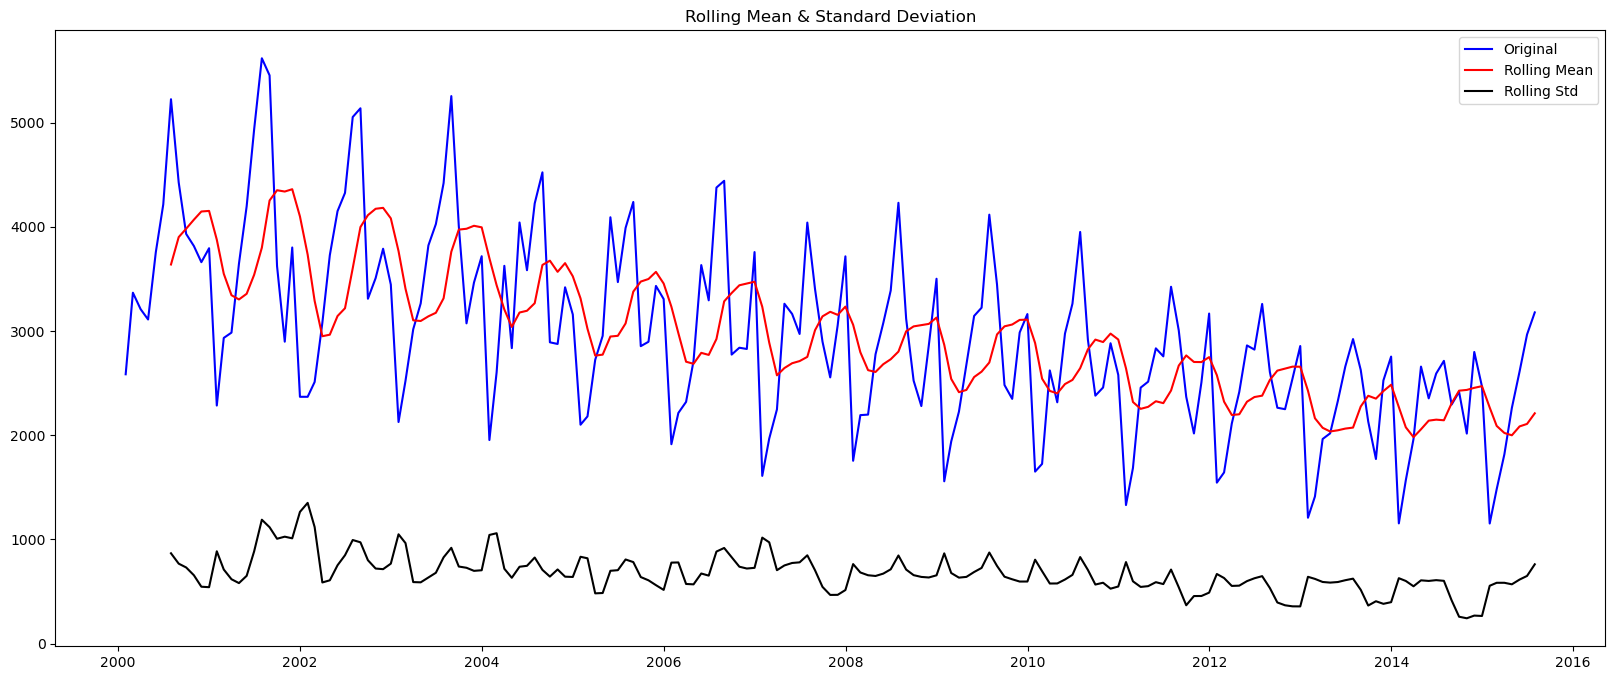

Results of Dickey-Fuller Test:
Test Statistic                  -0.907380
p-value                          0.785532
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [23]:
test_stationarity(df['RetailSales'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

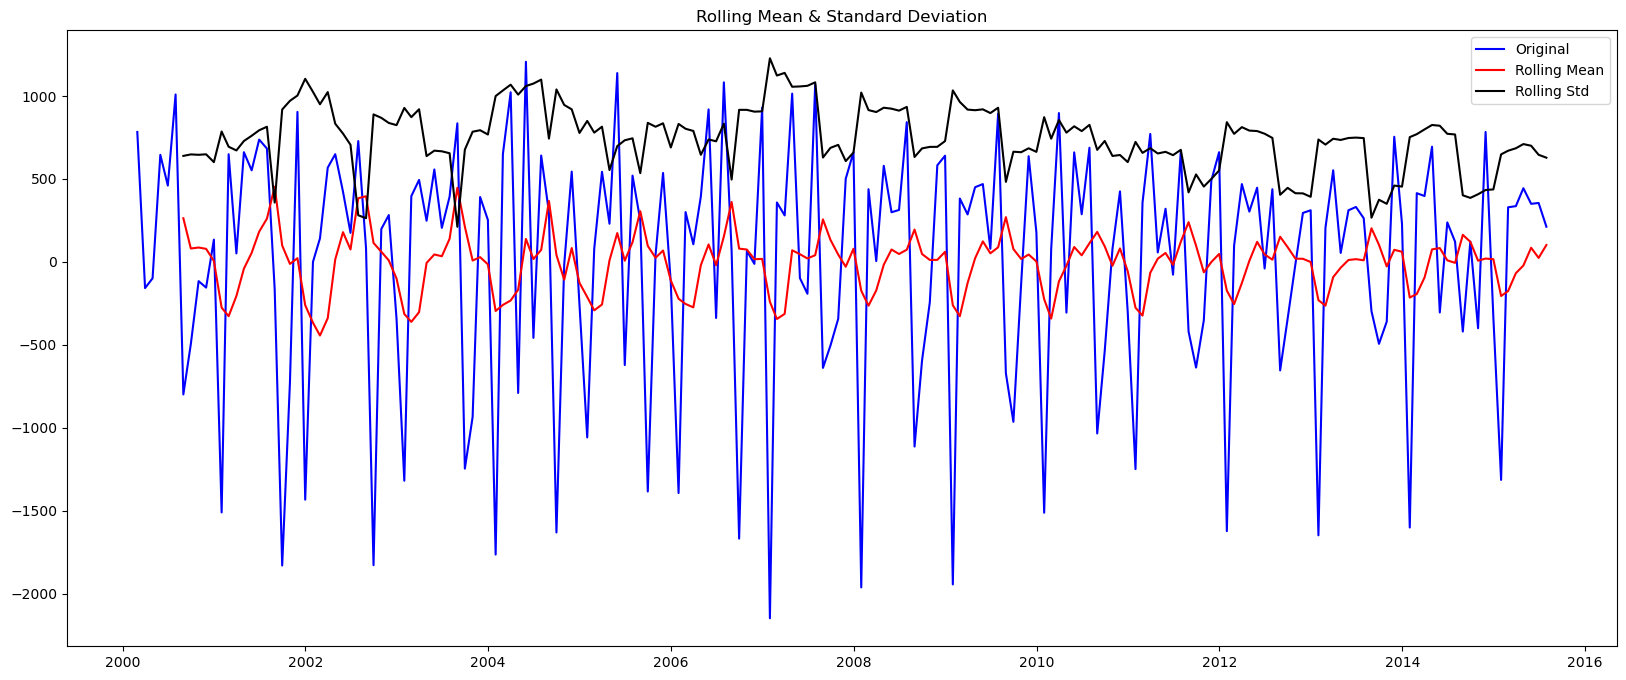

Results of Dickey-Fuller Test:
Test Statistic                 -23.500036
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [24]:
test_stationarity(df['RetailSales'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

## Plot the Autocorrelation function plots on the whole data.

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

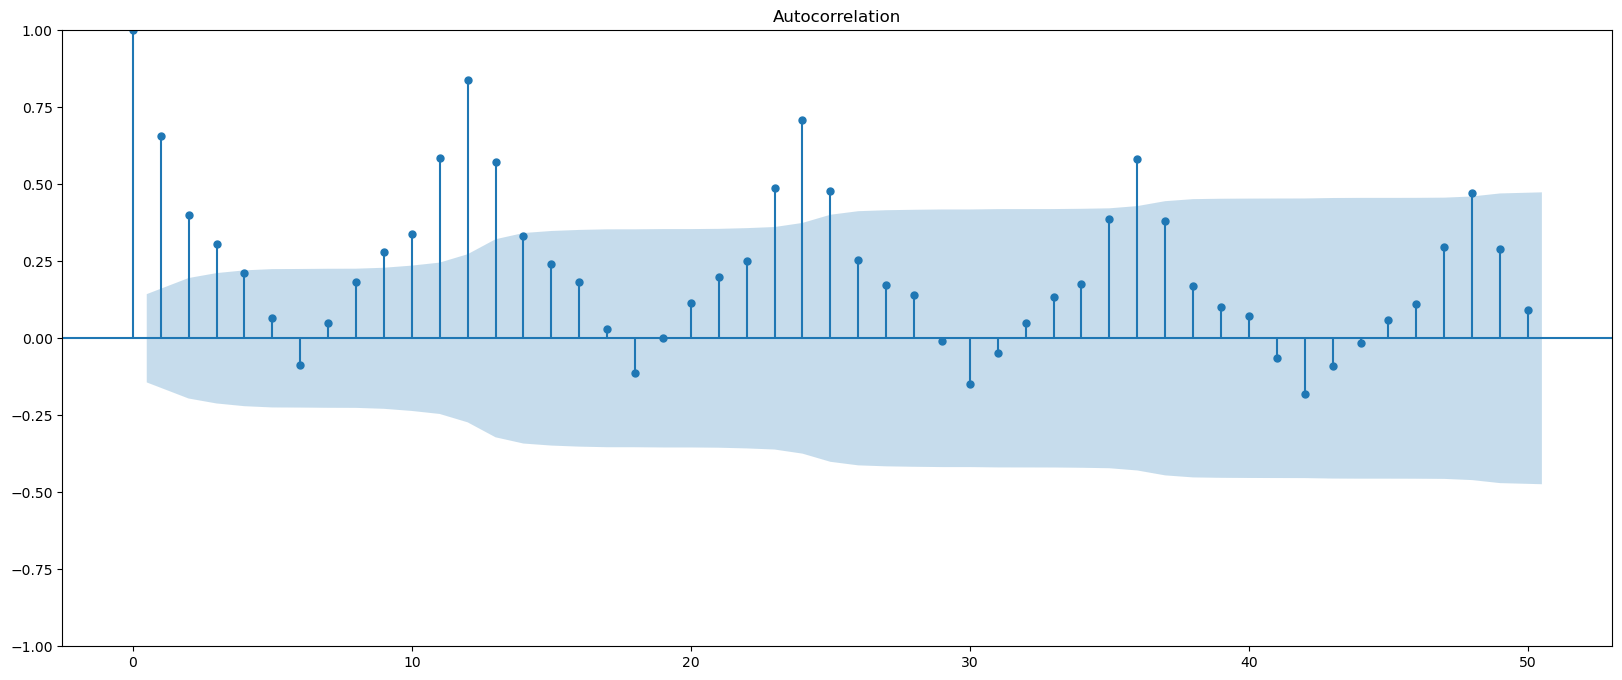

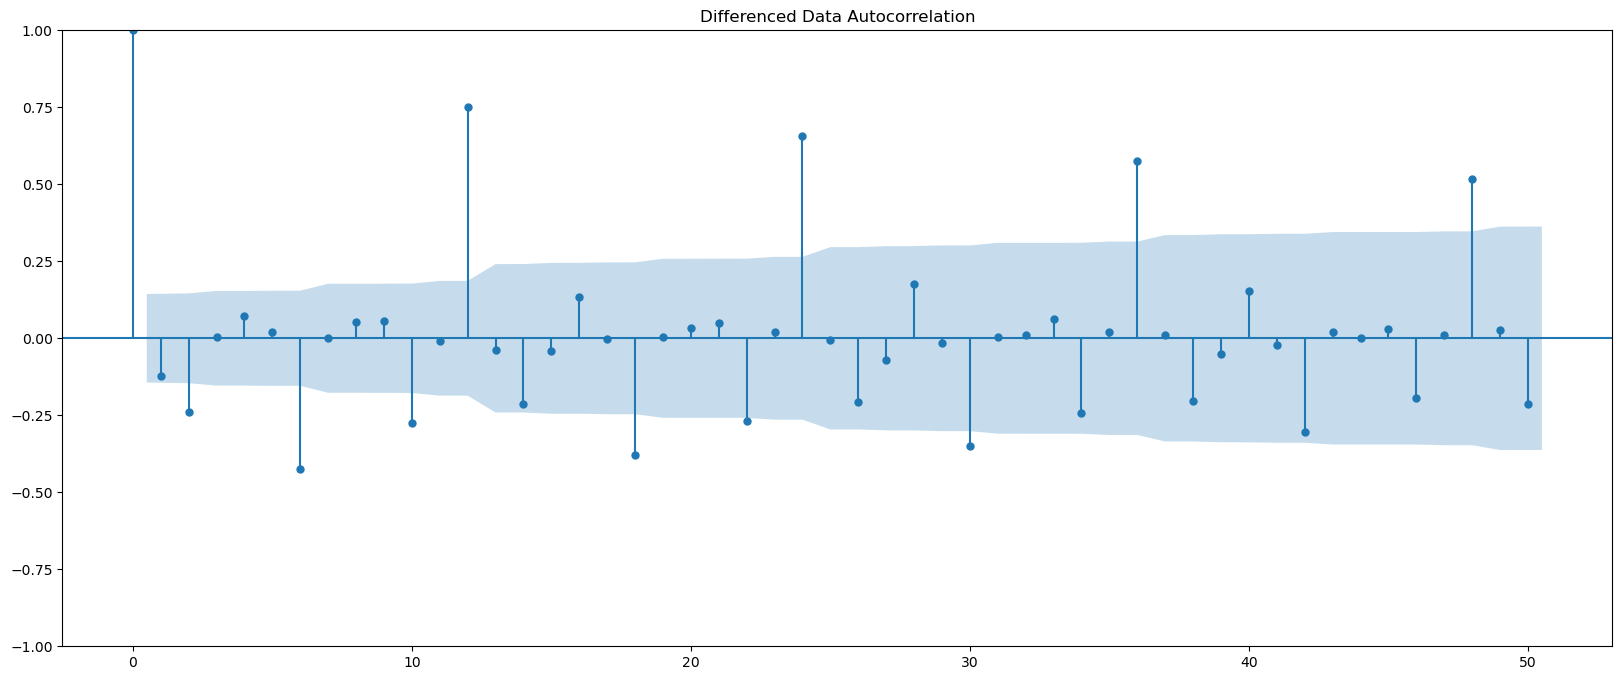

In [26]:
plot_acf(df['RetailSales'],lags=50)
plot_acf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 2010. Test Data is from the beginning of 2011 to the last time stamp provided.

In [27]:
train=df[df.index.year < 2011]
test=df[df.index.year >= 2011]

In [28]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [29]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,RetailSales
Time_Stamp,
2000-01-31,2585
2000-02-29,3368
2000-03-31,3210
2000-04-30,3111
2000-05-31,3756


Last few rows of Training Data


,RetailSales
Time_Stamp,
2010-08-31,2917
2010-09-30,2380
2010-10-31,2458
2010-11-30,2883
2010-12-31,2579


First few rows of Test Data


,RetailSales
Time_Stamp,
2011-01-31,1330
2011-02-28,1686
2011-03-31,2457
2011-04-30,2514
2011-05-31,2834


Last few rows of Test Data


,RetailSales
Time_Stamp,
2015-03-31,1818
2015-04-30,2262
2015-05-31,2612
2015-06-30,2967
2015-07-31,3179


In [30]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Check for stationarity of the Training Data Time Series.

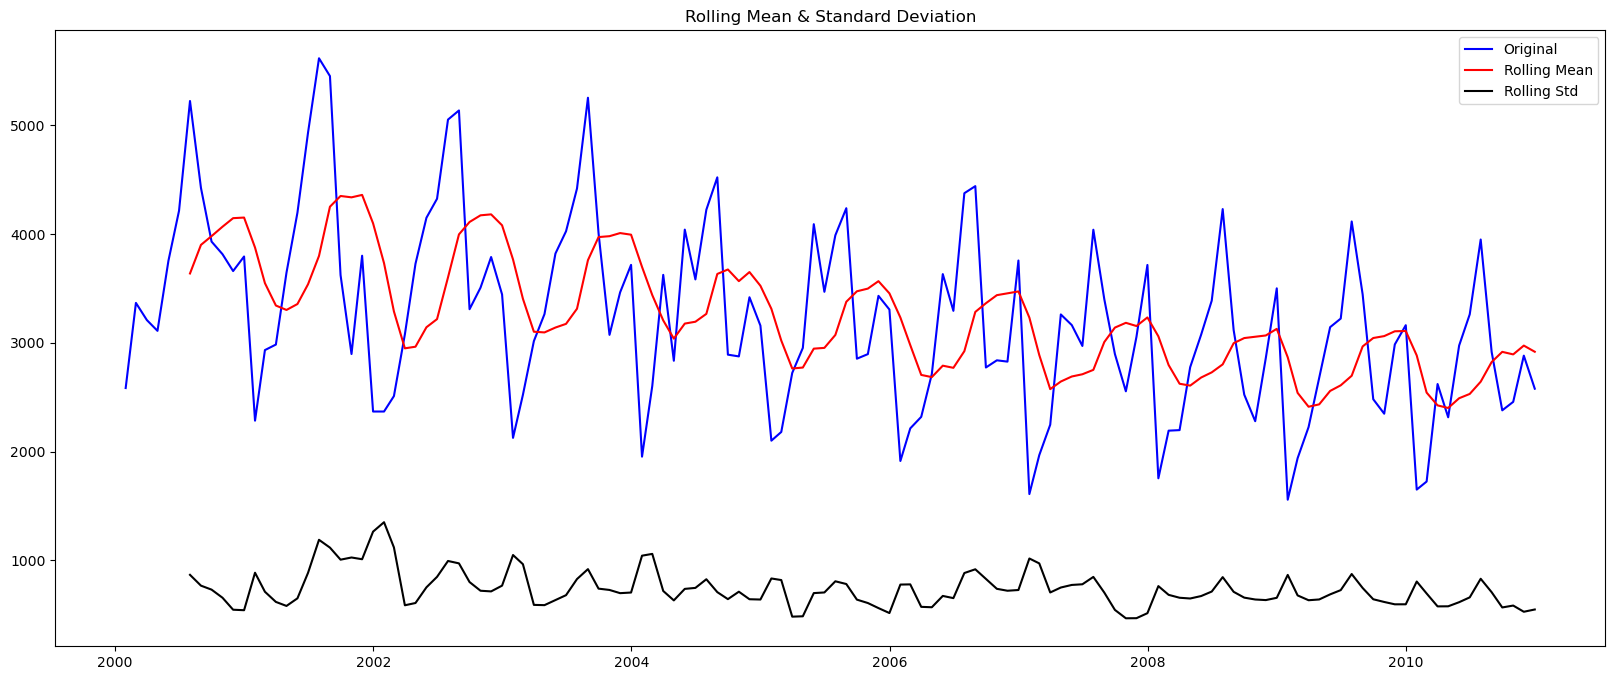

Results of Dickey-Fuller Test:
Test Statistic                  -0.380788
p-value                          0.913257
#Lags Used                      11.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64 



In [31]:
test_stationarity(train['RetailSales'])

We see that the series is not stationary at $\alpha$ = 0.05.

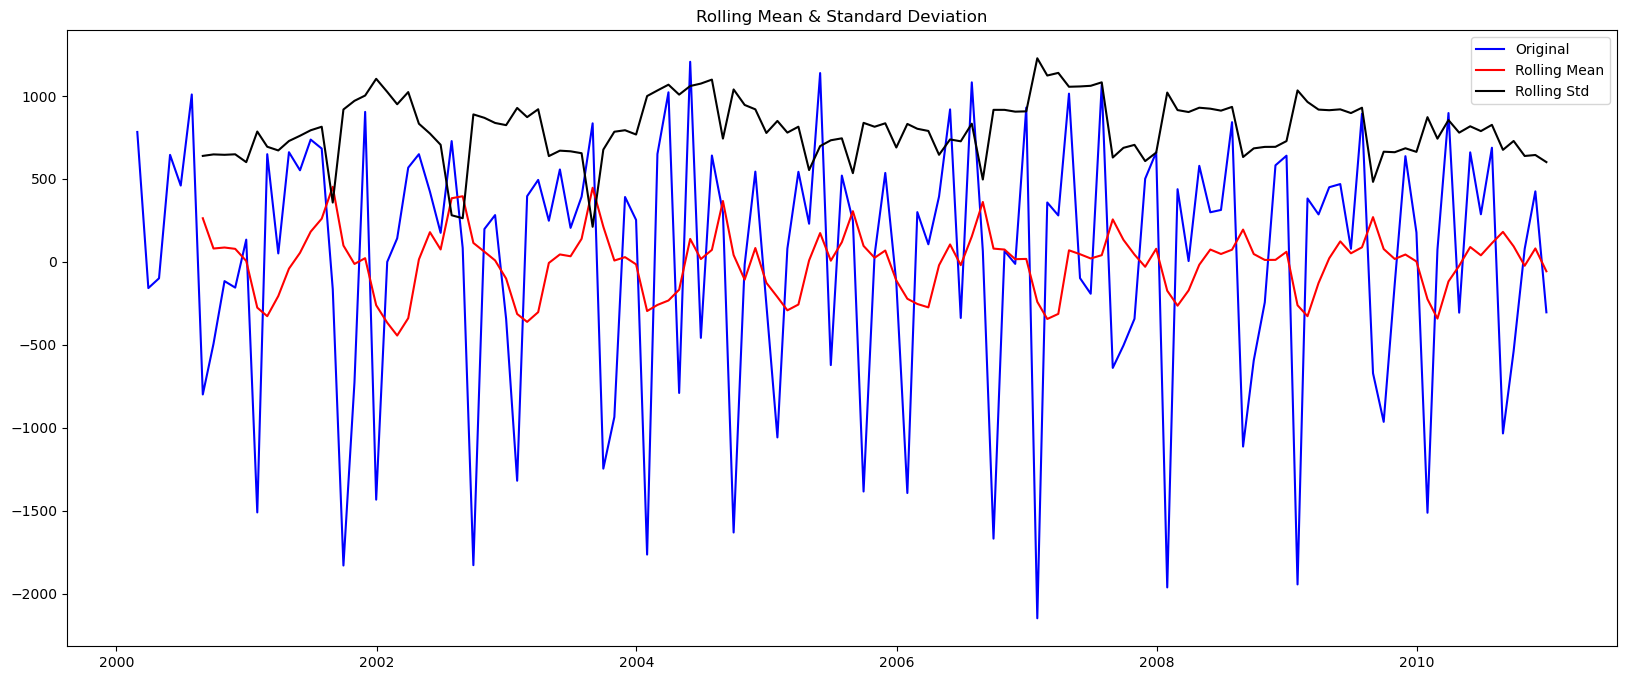

Results of Dickey-Fuller Test:
Test Statistic                 -18.948648
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64 



In [32]:
test_stationarity(train['RetailSales'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2000-01-31 to 2010-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   RetailSales  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## Build an Automated version of an <font color='blue'>ARMA model</font> for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [34]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we necessary for an ARMA model 

import itertools
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [35]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [36]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Initialize an empty DataFrame to store results
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

# Example loop to iterate over parameters (pdq)
for param in pdq:
    ARMA_model = ARIMA(train['RetailSales'].values, order=param).fit()
    print(f'ARIMA{param} - AIC: {ARMA_model.aic}')
    
    # Use pd.concat() to append the new row to ARMA_AIC
    new_row = pd.DataFrame({'param': [param], 'AIC': [ARMA_model.aic]})
    ARMA_AIC = pd.concat([ARMA_AIC, new_row], ignore_index=True)

# Display the results
print(ARMA_AIC)


ARIMA(0, 0, 0) - AIC: 2159.1539534272893
ARIMA(0, 0, 1) - AIC: 2112.2362465505203
ARIMA(0, 0, 2) - AIC: 2109.5407777645787
ARIMA(1, 0, 0) - AIC: 2106.333832606869
ARIMA(1, 0, 1) - AIC: 2106.9997301446297
ARIMA(1, 0, 2) - AIC: 2108.759695975099
ARIMA(2, 0, 0) - AIC: 2107.1963037474056
ARIMA(2, 0, 1) - AIC: 2106.370413082441
ARIMA(2, 0, 2) - AIC: 2108.4277231043234
       param          AIC
0  (0, 0, 0)  2159.153953
1  (0, 0, 1)  2112.236247
2  (0, 0, 2)  2109.540778
3  (1, 0, 0)  2106.333833
4  (1, 0, 1)  2106.999730
5  (1, 0, 2)  2108.759696
6  (2, 0, 0)  2107.196304
7  (2, 0, 1)  2106.370413
8  (2, 0, 2)  2108.427723


/var/folders/hk/x8mwfqgj5d13z747zxkxwbhw0000gn/T/ipykernel_18848/3750021778.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ARMA_AIC = pd.concat([ARMA_AIC, new_row], ignore_index=True)
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [37]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
3,"(1, 0, 0)",2106.333833
7,"(2, 0, 1)",2106.370413
4,"(1, 0, 1)",2106.999730
6,"(2, 0, 0)",2107.196304
8,"(2, 0, 2)",2108.427723
5,"(1, 0, 2)",2108.759696
2,"(0, 0, 2)",2109.540778
1,"(0, 0, 1)",2112.236247
0,"(0, 0, 0)",2159.153953


In [38]:
auto_ARIMA = ARIMA(train['RetailSales'], order=(1,0,0),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:            RetailSales   No. Observations:                  132
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1050.167
Date:                Thu, 10 Oct 2024   AIC                           2106.334
Time:                        15:18:34   BIC                           2114.982
Sample:                    01-31-2000   HQIC                          2109.848
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3226.5530    177.629     18.165      0.000    2878.407    3574.699
ar.L1          0.5829      0.084      6.965      0.000       0.419       0.747
sigma2      4.763e+05   6.06e+04      7.861      0.0

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


## Predict on the Test Set using this model and evaluate the model.

In [39]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [40]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['RetailSales'],predicted_auto_ARIMA,squared=False)
print(rmse)

1037.9071852704406


In [41]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,0,0)'])

resultsDf

,RMSE
"ARIMA(1,0,0)",1037.907185


**Note: the best model for ARMA is an AR MODEL as AR(1)**

## Build an Automated version of an <font color='blue'>ARIMA model</font> for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [42]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [43]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [44]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Example loop to iterate over parameters (pdq)
for param in pdq:
    ARMA_model = ARIMA(train['RetailSales'].values, order=param).fit()
    print(f'ARIMA{param} - AIC: {ARMA_model.aic}')
    
    # Use pd.concat() to append the new row to ARMA_AIC
    new_row = pd.DataFrame({'param': [param], 'AIC': [ARMA_model.aic]})
    ARMA_AIC = pd.concat([ARMA_AIC, new_row], ignore_index=True)

# Display the results
print(ARMA_AIC)


ARIMA(0, 1, 0) - AIC: 2116.919379651664
ARIMA(0, 1, 1) - AIC: 2115.4864178273965
ARIMA(0, 1, 2) - AIC: 2094.884078807595
ARIMA(1, 1, 0) - AIC: 2116.990860775634
ARIMA(1, 1, 1) - AIC: 2093.885726693098
ARIMA(1, 1, 2) - AIC: 2093.357760581126
ARIMA(2, 1, 0) - AIC: 2111.832093495572
ARIMA(2, 1, 1) - AIC: 2093.511051813447
ARIMA(2, 1, 2) - AIC: 2093.341552227941
        param          AIC
0   (0, 0, 0)  2159.153953
1   (0, 0, 1)  2112.236247
2   (0, 0, 2)  2109.540778
3   (1, 0, 0)  2106.333833
4   (1, 0, 1)  2106.999730
5   (1, 0, 2)  2108.759696
6   (2, 0, 0)  2107.196304
7   (2, 0, 1)  2106.370413
8   (2, 0, 2)  2108.427723
9   (0, 1, 0)  2116.919380
10  (0, 1, 1)  2115.486418
11  (0, 1, 2)  2094.884079
12  (1, 1, 0)  2116.990861
13  (1, 1, 1)  2093.885727
14  (1, 1, 2)  2093.357761
15  (2, 1, 0)  2111.832093
16  (2, 1, 1)  2093.511052
17  (2, 1, 2)  2093.341552


In [45]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC


In [46]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
17,"(2, 1, 2)",2093.341552
14,"(1, 1, 2)",2093.357761
16,"(2, 1, 1)",2093.511052
13,"(1, 1, 1)",2093.885727
11,"(0, 1, 2)",2094.884079
3,"(1, 0, 0)",2106.333833
7,"(2, 0, 1)",2106.370413
4,"(1, 0, 1)",2106.999730
6,"(2, 0, 0)",2107.196304
8,"(2, 0, 2)",2108.427723


In [47]:
auto_ARIMA = ARIMA(train['RetailSales'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:            RetailSales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1041.671
Date:                Thu, 10 Oct 2024   AIC                           2093.342
Time:                        15:18:35   BIC                           2107.718
Sample:                    01-31-2000   HQIC                          2099.183
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2113      0.238     -0.887      0.375      -0.678       0.256
ar.L2          0.3356      0.153      2.192      0.028       0.036       0.636
ma.L1         -0.1240      0.187     -0.664      0.5

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


## Predict on the Test Set using this model and evaluate the model.

In [48]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [49]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['RetailSales'],predicted_auto_ARIMA,squared=False)
print(rmse)

755.6206425757283


In [50]:
temp_resultsDf0 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf0])
resultsDf

,RMSE
"ARIMA(1,0,0)",1037.907185
"ARIMA(2,1,2)",755.620643


## Build an Automated version of a <font color='blue'>SARIMA</font> model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

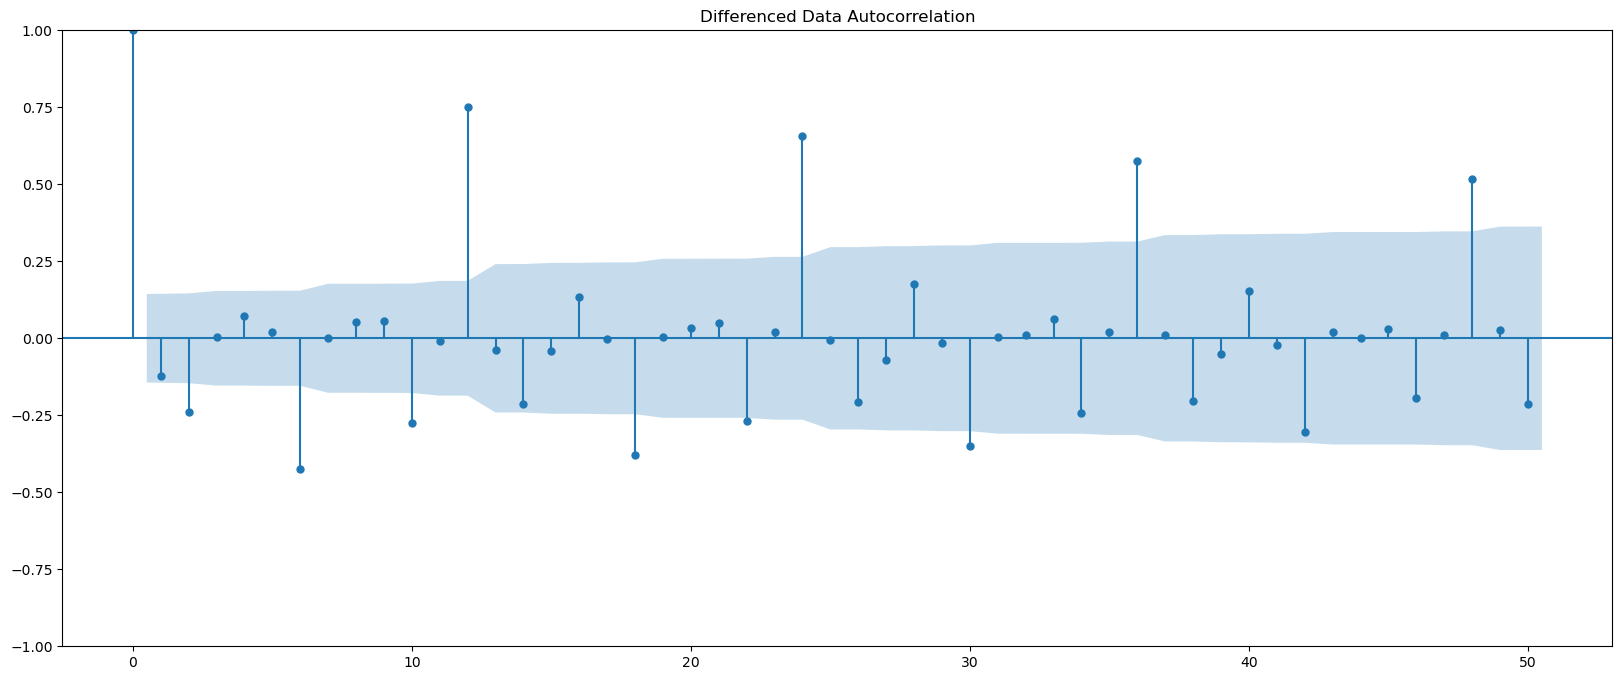

In [51]:
plot_acf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

#### We see that there can be a seasonality of 6 as well as 12. But from the decompostion at the start we ascertained that visually it looks like the seasonality =6 and thus using the same 

### Setting the seasonality as 6  to estimate parametrs using auto SARIMA model.

In [52]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [53]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [54]:
import statsmodels.api as sm
import pandas as pd

# Initialize an empty DataFrame to store results
SARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

# Loop over the parameter combinations for SARIMA
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['RetailSales'].values,
                                                 order=param,
                                                 seasonal_order=param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        
        # Create a DataFrame for the current result and concatenate
        new_row = pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_SARIMA.aic]})
        SARIMA_AIC = pd.concat([SARIMA_AIC, new_row], ignore_index=True)

# Display the SARIMA AIC DataFrame
print(SARIMA_AIC)


 This problem is unconstrained.
/var/folders/hk/x8mwfqgj5d13z747zxkxwbhw0000gn/T/ipykernel_18848/78352212.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  SARIMA_AIC = pd.concat([SARIMA_AIC, new_row], ignore_index=True)
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.94983D+00    |proj g|=  9.53664D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   9.537D-06   7.950D+00
  F =   7.9498290138534768     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2100.754859657318
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     47      1     0     0   1.929D-05   6.799D+00
  F =   6.7985547540507989     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1804.818455069411
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.87821D+00    |proj g|=  3.49464D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.46297D+00    |proj g|=  5.95269D-03

At iterate   15    f=  7.46209D+00    |proj g|=  9.91155D-02

At iterate   20    f=  7.41780D+00    |proj g|=  1.63935D-01

At iterate   25    f=  7.41645D+00    |proj g|=  9.59599D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     35      1     0     0   2.232D-06   7.416D+00
  F =   7.4164503237318362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1963.9428854652047
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  6.66437D+00    |proj g|=  2.89823D-01

At iterate   30    f=  6.61699D+00    |proj g|=  1.87684D-01

At iterate   35    f=  6.60907D+00    |proj g|=  1.25520D-02

At iterate   40    f=  6.60905D+00    |proj g|=  6.67103D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     51      1     0     0   8.610D-06   6.609D+00
  F =   6.6090510146277781     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1754.7894678617333
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.94000D+00    |proj g|=  1.53503D-02

At iterate   20    f=  6.88152D+00    |proj g|=  3.18159D-01

At iterate   25    f=  6.66578D+00    |proj g|=  1.65244D-01

At iterate   30    f=  6.64614D+00    |proj g|=  1.76189D-02

At iterate   35    f=  6.64541D+00    |proj g|=  5.06569D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     42      1     0     0   3.597D-06   6.645D+00
  F =   6.6454095058706191     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1764.3881095498434
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.84273D+00    |proj g|=  3.13225D-02

At iterate   20    f=  6.76443D+00    |proj g|=  2.28172D-01

At iterate   25    f=  6.73002D+00    |proj g|=  2.85298D-02

At iterate   30    f=  6.72994D+00    |proj g|=  3.50129D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     36      1     0     0   3.501D-06   6.730D+00
  F =   6.7299434780391074     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1786.7050782023243
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1845.2884465814295
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.85337D+00    |proj g|=  1.16997D-01

At iterate    5    f=  6.79451D+00    |proj g|=  1.04687D-01

At iterate   10    f=  6.76962D+00    |proj g|=  3.77466D-02

At iterate   15    f=  6.76824D+00    |proj g|=  1.20065D-03

At iterate   20    f=  6.76823D+00    |proj g|=  2.41852D-03

At iterate   25    f=  6.76746D+00    |proj g|=  4.28746D-02

At iterate   30    f=  6.70227D+00    |proj g|=  3.03967D-01

At iterate   35    f=  6.53263D+00    |proj g|=  1.57308D-01

At iterate   40    f=  6.52319D+00    |proj g|=  9.09581D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.92493D+00    |proj g|=  2.54161D-03

At iterate   20    f=  6.92388D+00    |proj g|=  3.57475D-02

At iterate   25    f=  6.76838D+00    |proj g|=  4.10517D-01

At iterate   30    f=  6.64469D+00    |proj g|=  8.78971D-02

At iterate   35    f=  6.64290D+00    |proj g|=  8.13449D-03

At iterate   40    f=  6.64280D+00    |proj g|=  1.88617D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     51      1     0     0   1.886D-05   6.643D+00
  F =   6.6427989774563621     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1765.69893004847

 This problem is unconstrained.



At iterate   20    f=  6.70191D+00    |proj g|=  2.06548D-01

At iterate   25    f=  6.48449D+00    |proj g|=  4.67990D-01

At iterate   30    f=  6.41474D+00    |proj g|=  2.99898D-02

At iterate   35    f=  6.41128D+00    |proj g|=  2.29837D-02

At iterate   40    f=  6.41122D+00    |proj g|=  1.59191D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     52      1     0     0   2.211D-05   6.411D+00
  F =   6.4112241614990699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1706.5631786357544
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.94814D+00    |proj g|=  4.44835D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     28      1     0     0   9.395D-06   6.948D+00
  F =   6.9480117301289521     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1842.2750967540433
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.48873D+00    |proj g|=  6.37378D-02

At iterate    5    f=  7.48581D+00    |proj g|=  2.65428D-03

At iterate   10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.86089D+00    |proj g|=  1.96983D-01

At iterate   25    f=  6.69472D+00    |proj g|=  2.76009D-01

At iterate   30    f=  6.65794D+00    |proj g|=  2.17951D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     39      1     0     0   1.070D-04   6.658D+00
  F =   6.6579351957358828     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1769.694891674273
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.91448D+00    |proj g|=  7.66302D-04

At iterate   15    f=  6.91425D+00    |proj g|=  1.05721D-02

At iterate   20    f=  6.89579D+00    |proj g|=  1.02943D-01

At iterate   25    f=  6.79803D+00    |proj g|=  6.22233D-03

At iterate   30    f=  6.79798D+00    |proj g|=  2.58531D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     37      1     0     0   2.585D-06   6.798D+00
  F =   6.7979782142168999     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1804.6662485532615
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  7.02985D+00    |proj g|=  4.35369D-01

At iterate   35    f=  7.02149D+00    |proj g|=  6.11267D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     52      1     0     0   1.990D-05   7.021D+00
  F =   7.0214861959357107     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:1863.6723557270277
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.92826D+00    |proj g|=  1.21546D-01

At iterate    5

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.87310D+00    |proj g|=  2.10930D-03

At iterate   15    f=  6.87299D+00    |proj g|=  4.87674D-03

At iterate   20    f=  6.85438D+00    |proj g|=  7.05393D-02

At iterate   25    f=  6.62390D+00    |proj g|=  2.20985D-01

At iterate   30    f=  6.58769D+00    |proj g|=  6.50041D-02

At iterate   35    f=  6.58553D+00    |proj g|=  1.42279D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     48      1     0     0   2.141D-05   6.586D+00
  F =   6.5855256807072795     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1750.57877970672

 This problem is unconstrained.



At iterate   20    f=  6.80004D+00    |proj g|=  3.58251D-02

At iterate   25    f=  6.71548D+00    |proj g|=  2.15116D-01

At iterate   30    f=  6.49517D+00    |proj g|=  1.64723D-01

At iterate   35    f=  6.47546D+00    |proj g|=  2.16078D-02

At iterate   40    f=  6.47502D+00    |proj g|=  8.68400D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     53      1     0     0   7.857D-05   6.475D+00
  F =   6.4750171287904790     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1723.4045220006865
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.32863D+00    |proj g|=  3.11654D-02

At iterate   15    f=  7.32630D+00    |proj g|=  3.04287D-04

At iterate   20    f=  7.32628D+00    |proj g|=  3.24574D-03

At iterate   25    f=  7.32506D+00    |proj g|=  4.79007D-02

At iterate   30    f=  7.30922D+00    |proj g|=  1.21840D-02

At iterate   35    f=  7.30907D+00    |proj g|=  1.25699D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     42      1     0     0   3.460D-05   7.309D+00
  F =   7.3090673416694356     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:1939.59377820073

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  7.14199D+00    |proj g|=  3.49942D-02

At iterate   35    f=  7.13451D+00    |proj g|=  6.70071D-01

At iterate   40    f=  6.97675D+00    |proj g|=  4.74861D-01

At iterate   45    f=  6.96190D+00    |proj g|=  1.45095D-01

At iterate   50    f=  6.95048D+00    |proj g|=  6.73327D-02

At iterate   55    f=  6.95004D+00    |proj g|=  3.99609D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     57     74      1     0     0   4.428D-05   6.950D+00
  F =   6.9500432679659330     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1846.81142274300

 This problem is unconstrained.



At iterate   20    f=  6.76744D+00    |proj g|=  1.48085D-02

At iterate   25    f=  6.76736D+00    |proj g|=  8.64078D-04

At iterate   30    f=  6.76713D+00    |proj g|=  1.16172D-02

At iterate   35    f=  6.74891D+00    |proj g|=  1.91653D-01

At iterate   40    f=  6.71390D+00    |proj g|=  1.46274D+00

At iterate   45    f=  6.70100D+00    |proj g|=  2.90191D-01

At iterate   50    f=  6.64131D+00    |proj g|=  9.12861D-01

At iterate   55    f=  6.62153D+00    |proj g|=  1.88381D-01

At iterate   60    f=  6.57136D+00    |proj g|=  2.08341D-01

At iterate   65    f=  6.55698D+00    |proj g|=  2.03331D-01

At iterate   70    f=  6.54827D+00    |proj g|=  4.92483D-01

At iterate   75    f=  6.53399D+00    |proj g|=  9.17262D-02

At iterate   80    f=  6.53300D+00    |proj g|=  9.18404D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.86319D+00    |proj g|=  8.86058D-03

At iterate   10    f=  6.86303D+00    |proj g|=  2.93752D-03

At iterate   15    f=  6.86217D+00    |proj g|=  6.89065D-03

At iterate   20    f=  6.86205D+00    |proj g|=  3.14703D-03

At iterate   25    f=  6.85765D+00    |proj g|=  2.62315D-02

At iterate   30    f=  6.79701D+00    |proj g|=  2.21188D-01

At iterate   35    f=  6.58740D+00    |proj g|=  4.89461D-02

At iterate   40    f=  6.58214D+00    |proj g|=  2.41606D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     57      1     0     0   2.609D-05   6.582D+00
  F =   6.58213517296

 This problem is unconstrained.



At iterate   35    f=  6.45738D+00    |proj g|=  2.00130D-01

At iterate   40    f=  6.41653D+00    |proj g|=  6.46228D-02

At iterate   45    f=  6.41386D+00    |proj g|=  7.72934D-03

At iterate   50    f=  6.41309D+00    |proj g|=  2.38954D-02

At iterate   55    f=  6.41251D+00    |proj g|=  1.81083D-03

At iterate   60    f=  6.41250D+00    |proj g|=  2.37689D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     61     72      1     0     0   1.291D-04   6.413D+00
  F =   6.4125042215129033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1708.90111447940

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.99391D+00    |proj g|=  1.24255D-02

At iterate   15    f=  6.98189D+00    |proj g|=  1.38667D-01

At iterate   20    f=  6.92291D+00    |proj g|=  5.04698D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   1.326D-06   6.923D+00
  F =   6.9228551201989248     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1837.6337517325162
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.93008D+00    |proj g|=  1.16000D-01

At iterate   10    f=  6.92283D+00    |proj g|=  4.37081D-03

At iterate   15    f=  6.92278D+00    |proj g|=  1.84684D-03

At iterate   20    f=  6.92217D+00    |proj g|=  2.28054D-02

At iterate   25    f=  6.84116D+00    |proj g|=  1.66912D-01

At iterate   30    f=  6.76912D+00    |proj g|=  7.88595D-02

At iterate   35    f=  6.75795D+00    |proj g|=  1.32208D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     47      1     0     0   2.674D-06   6.758D+00
  F =   6.7579477786354802     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.86282D+00    |proj g|=  1.68403D-01

At iterate    5    f=  6.82326D+00    |proj g|=  9.57506D-03

At iterate   10    f=  6.82225D+00    |proj g|=  1.65153D-03

At iterate   15    f=  6.82174D+00    |proj g|=  2.34457D-02

At iterate   20    f=  6.77298D+00    |proj g|=  1.73645D-01

At iterate   25    f=  6.63762D+00    |proj g|=  7.33929D-02

At iterate   30    f=  6.61569D+00    |proj g|=  4.49783D-02

At iterate   35    f=  6.61435D+00    |proj g|=  1.80847D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.38697D+00    |proj g|=  5.65406D-02

At iterate   15    f=  7.38550D+00    |proj g|=  3.05750D-04

At iterate   20    f=  7.38547D+00    |proj g|=  6.73621D-03

At iterate   25    f=  7.37415D+00    |proj g|=  1.15509D-01

At iterate   30    f=  7.36835D+00    |proj g|=  9.10577D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     43      1     0     0   7.150D-06   7.368D+00
  F =   7.3683502670993795     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:1955.2444705142361
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  7.03758D+00    |proj g|=  4.42724D-01

At iterate   40    f=  6.99865D+00    |proj g|=  9.09729D-02

At iterate   45    f=  6.99758D+00    |proj g|=  5.02172D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     57      1     0     0   5.022D-04   6.998D+00
  F =   6.9975775425475453     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:1859.3604712325518
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   30    f=  6.78107D+00    |proj g|=  1.96791D-01

At iterate   35    f=  6.61744D+00    |proj g|=  2.41206D-01

At iterate   40    f=  6.60680D+00    |proj g|=  1.68126D-02

At iterate   45    f=  6.60657D+00    |proj g|=  2.47752D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     66      1     0     0   2.696D-05   6.607D+00
  F =   6.6065732801283614     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1758.1353459538875
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.80426D+00    |proj g|=  2.22191D-02

At iterate   25    f=  6.67674D+00    |proj g|=  4.02087D-01

At iterate   30    f=  6.53667D+00    |proj g|=  5.34680D-02

At iterate   35    f=  6.53366D+00    |proj g|=  9.68303D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     52      1     0     0   5.247D-05   6.534D+00
  F =   6.5336622210193704     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1736.8868263491138
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  6.80222D+00    |proj g|=  4.18004D-02

At iterate   10    f=  6.79741D+00    |proj g|=  1.60473D-02

At iterate   15    f=  6.79718D+00    |proj g|=  1.53596D-03

At iterate   20    f=  6.79705D+00    |proj g|=  4.00560D-03

At iterate   25    f=  6.77876D+00    |proj g|=  1.93537D-01

At iterate   30    f=  6.57259D+00    |proj g|=  1.21933D-01

At iterate   35    f=  6.51435D+00    |proj g|=  1.53077D-01

At iterate   40    f=  6.47775D+00    |proj g|=  1.47191D-01

At iterate   45    f=  6.47443D+00    |proj g|=  1.55294D-02

At iterate   50    f=  6.47436D+00    |proj g|=  2.15372D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.32468D+00    |proj g|=  1.47999D-03

At iterate   30    f=  7.32448D+00    |proj g|=  1.75010D-02

At iterate   35    f=  7.31235D+00    |proj g|=  6.01909D-02

At iterate   40    f=  7.30771D+00    |proj g|=  1.69219D-02

At iterate   45    f=  7.30737D+00    |proj g|=  7.15293D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     62      1     0     0   6.495D-06   7.307D+00
  F =   7.3073663832979410     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1941.1447251906563
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   30    f=  6.83069D+00    |proj g|=  6.69122D-02

At iterate   35    f=  6.72407D+00    |proj g|=  3.35775D-02

At iterate   40    f=  6.72292D+00    |proj g|=  3.72123D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     55      1     0     0   1.693D-06   6.723D+00
  F =   6.7229180703856199     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1788.8503705818036
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  7.22496D+00    |proj g|=  9.59597D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   9.596D-05   7.225D+00
  F =   7.2249609012060718     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1919.3896779184029
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.40122D+00    |proj g|=  9.19201D-01

At iterate    5    f=  7.15105D+00    |proj g|=  5.44171D-02

At iterate   10

 This problem is unconstrained.



At iterate   20    f=  6.76375D+00    |proj g|=  8.11105D-03

At iterate   25    f=  6.76362D+00    |proj g|=  1.29647D-03

At iterate   30    f=  6.76353D+00    |proj g|=  9.61034D-03

At iterate   35    f=  6.75699D+00    |proj g|=  6.21631D-02

At iterate   40    f=  6.61051D+00    |proj g|=  2.37759D-01

At iterate   45    f=  6.53168D+00    |proj g|=  3.28088D-01

At iterate   50    f=  6.51963D+00    |proj g|=  5.79183D-02

At iterate   55    f=  6.51824D+00    |proj g|=  6.49150D-03

At iterate   60    f=  6.51820D+00    |proj g|=  4.32402D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     61     75   

 This problem is unconstrained.



At iterate   40    f=  6.53864D+00    |proj g|=  9.69298D-02

At iterate   45    f=  6.52954D+00    |proj g|=  1.34451D-02

At iterate   50    f=  6.52950D+00    |proj g|=  1.88575D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65      1     0     0   1.886D-05   6.530D+00
  F =   6.5295024223883136     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1737.7886395105147
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   25    f=  6.80356D+00    |proj g|=  1.02647D-03

At iterate   30    f=  6.80338D+00    |proj g|=  7.61582D-03

At iterate   35    f=  6.79868D+00    |proj g|=  6.57856D-02

At iterate   40    f=  6.76425D+00    |proj g|=  7.35298D-02

At iterate   45    f=  6.62984D+00    |proj g|=  4.75951D-01

At iterate   50    f=  6.53316D+00    |proj g|=  1.02497D-01

At iterate   55    f=  6.52900D+00    |proj g|=  5.48875D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     59     85      1     0     0   4.790D-05   6.529D+00
  F =   6.5289847360858353     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   30    f=  6.70931D+00    |proj g|=  5.01070D-02

At iterate   35    f=  6.66580D+00    |proj g|=  3.37910D-02

At iterate   40    f=  6.48457D+00    |proj g|=  9.20920D-02

At iterate   45    f=  6.45671D+00    |proj g|=  1.00316D-01

At iterate   50    f=  6.42185D+00    |proj g|=  7.21704D-02

At iterate   55    f=  6.42031D+00    |proj g|=  1.13884D-02

At iterate   60    f=  6.41557D+00    |proj g|=  6.65574D-02

At iterate   65    f=  6.41061D+00    |proj g|=  1.59902D-02

At iterate   70    f=  6.40995D+00    |proj g|=  6.75576D-03

At iterate   75    f=  6.40985D+00    |proj g|=  2.77246D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [55]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 6)",1706.563179
53,"(1, 1, 2)","(2, 0, 2, 6)",1708.901114
80,"(2, 1, 2)","(2, 0, 2, 6)",1710.199325
17,"(0, 1, 1)","(2, 0, 2, 6)",1721.477119
44,"(1, 1, 1)","(2, 0, 2, 6)",1723.404522


In [56]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['RetailSales'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.79245D+00    |proj g|=  1.57671D-01

At iterate    5    f=  6.74021D+00    |proj g|=  9.36155D-03

At iterate   10    f=  6.73966D+00    |proj g|=  8.95838D-04

At iterate   15    f=  6.73922D+00    |proj g|=  7.77315D-03

At iterate   20    f=  6.70191D+00    |proj g|=  2.06548D-01

At iterate   25    f=  6.48449D+00    |proj g|=  4.67990D-01

At iterate   30    f=  6.41474D+00    |proj g|=  2.99898D-02

At iterate   35    f=  6.41128D+00    |proj g|=  2.29837D-02

At iterate   40    f=  6.41122D+00    |proj g|=  1.59191D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     52      1     0     0   2.211D-05   6.411D+00
  F =   6.4112241614990699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -846.282
Date:                           Thu, 10 Oct 2024   AIC                           1706.563
Time:                                   15:18:46   BIC         

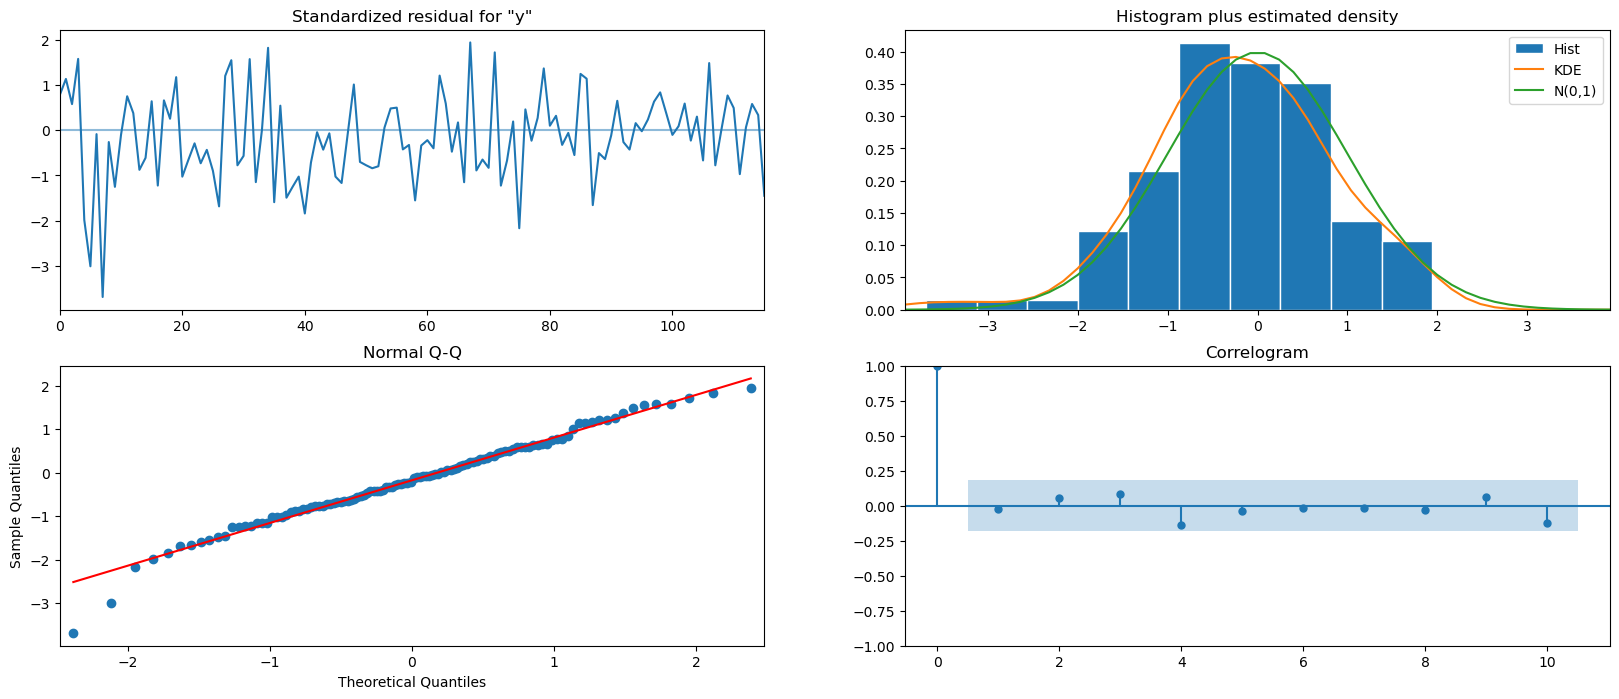

In [57]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

## Predict on the Test Set using this model and evaluate the model.

In [58]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [59]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1524.706072,345.042415,848.435365,2200.976778
1,1814.780301,345.110369,1138.376407,2491.184196
2,2222.003202,345.123648,1545.573282,2898.433121
3,2348.241728,345.123129,1671.812825,3024.670631
4,2850.850007,345.123099,2174.421163,3527.278852


In [60]:
rmse = mean_squared_error(test['RetailSales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

228.0481567093992


In [61]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(1,0,0)",1037.907185
"ARIMA(2,1,2)",755.620643
"SARIMA(0,1,2)(2,0,2,6)",228.048157


We see that we have huge gain the RMSE value by including the seasonal parameters as well.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

#### This is where our model building exercise ends. 

Please do try out with 12 as a seasonal parameter and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.



## Building the most optimum model on the Full Data.

In [62]:
full_data_model = sm.tsa.statespace.SARIMAX(df['RetailSales'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98320D+00    |proj g|=  1.44751D-01

At iterate    5    f=  6.93523D+00    |proj g|=  1.02322D-02

At iterate   10    f=  6.93483D+00    |proj g|=  1.03153D-03

At iterate   15    f=  6.93451D+00    |proj g|=  1.43903D-02

At iterate   20    f=  6.90996D+00    |proj g|=  6.29109D-02

At iterate   25    f=  6.80252D+00    |proj g|=  4.68779D-01


/Users/ishashukla/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   30    f=  6.60920D+00    |proj g|=  4.05851D-01

At iterate   35    f=  6.56233D+00    |proj g|=  5.35270D-02

At iterate   40    f=  6.56152D+00    |proj g|=  1.83516D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     59      1     0     0   7.829D-05   6.562D+00
  F =   6.5615195944227160     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                     
Dep. Variable:                       RetailSales   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Li

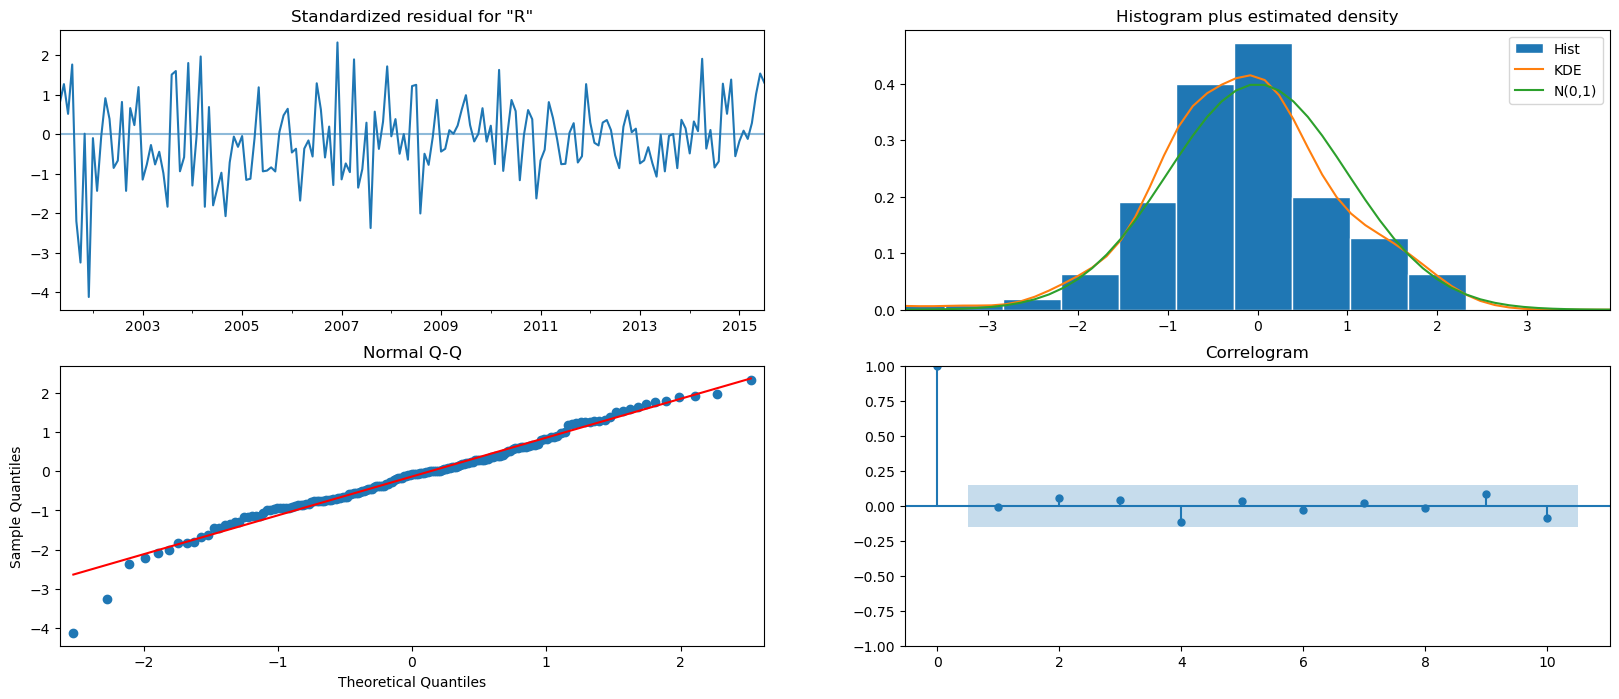

In [63]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole and predict 17 months into the future (till the end of next year).

In [64]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=17)

In [65]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

RetailSales,mean,mean_se,mean_ci_lower,mean_ci_upper
2015-08-31,2355.728533,307.198106,1753.631308,2957.825758
2015-09-30,2087.249680,307.638676,1484.288956,2690.210405
2015-10-31,1829.177388,307.638642,1226.216729,2432.138047
2015-11-30,2417.955527,307.638639,1814.994874,3020.916180
2015-12-31,2454.989177,307.638642,1852.028519,3057.949835


In [66]:
rmse = mean_squared_error(df['RetailSales'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 443.26013724515315


In [67]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='2015-08-31',end='2016-12-31', freq='M'))

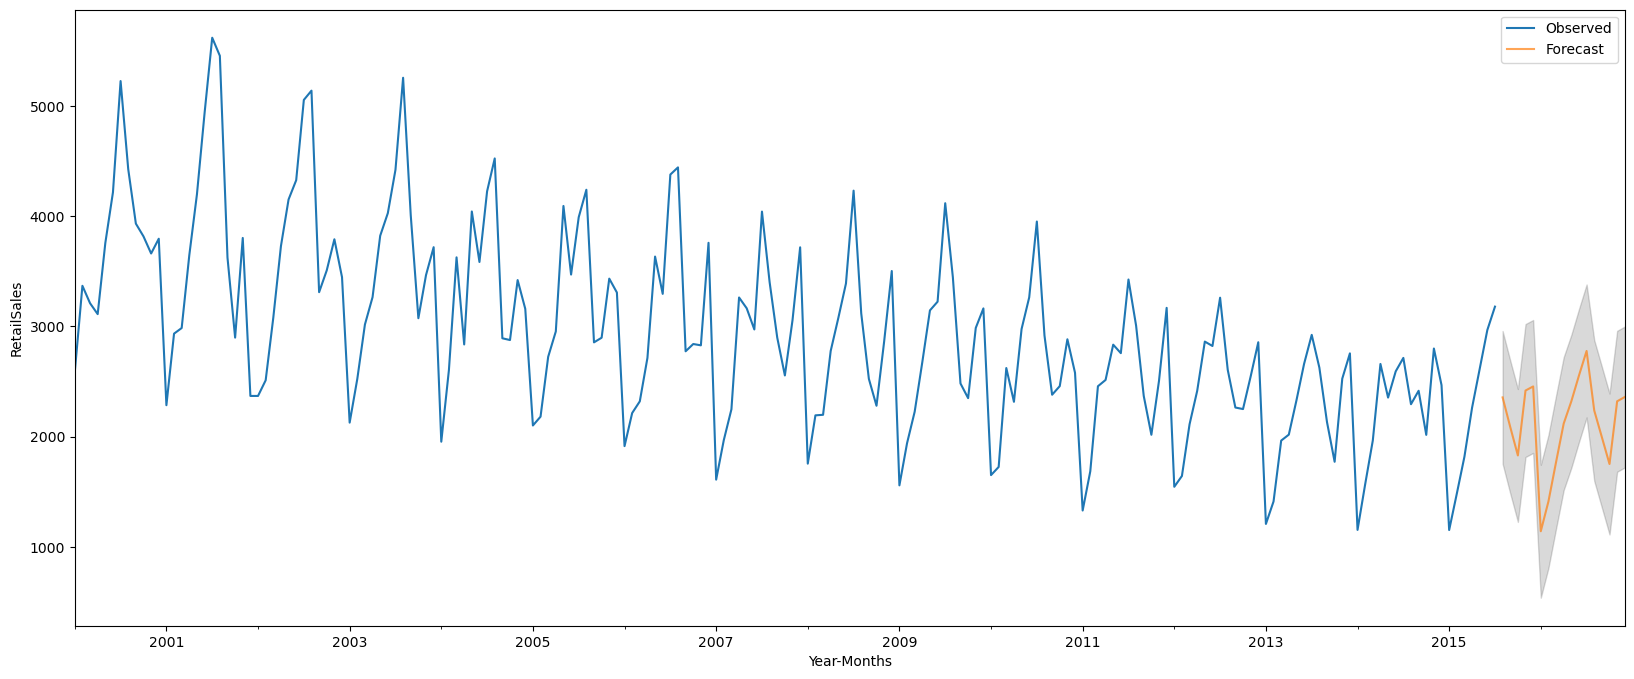

In [68]:
# plot the forecast along with the confidence band

axis = df['RetailSales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()

In [69]:
resultsDf

,RMSE
"ARIMA(1,0,0)",1037.907185
"ARIMA(2,1,2)",755.620643
"SARIMA(0,1,2)(2,0,2,6)",228.048157


#### You can see how AR model improves using different techniques 

#### The SARIMA(0,1,2)(2,0,2,6) model has the lowest **RMSE of 228.05**, making it the best model among the three based on this metric.

#### This suggests that the **SARIMA model** fits your data much better than the ARIMA models.

# END